# THE MOVIE INDUSTRY ANALYSIS

<img src="https://thumbs2.imgbox.com/9e/9f/ybIDYUcI_t.jpg" />

### <p style='text-align: right;'> BY OLALEKAN SAMSON OLUJOBI </p>

### This is my analysis of the movie industry dataset derived from [here](https://www.kaggle.com/datasets/danielgrijalvas/movies) 

##### credit to Alex The Analyst for his free tutorial videos, click [here](https://www.youtube.com/watch?v=iPYVYBtUTyE) to access to this video tutorial on YouTube

<br/>

In [127]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Configuration adjustment for the plots to be created

In [128]:
movies = pd.read_csv(r"C:\Users\IMPLILEKAN\Documents\SAMSON\Data Files\DataSets\movies\movies.csv") #collects the csv file into the variable 'movies'
movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [129]:
# check for null values (missing data)

movies.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [130]:
# percentage of null values in each column

for col in movies.columns:
    pct_missing = np.mean(movies[col].isnull())
    print(f'{col} - {pct_missing}%')

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [131]:
# check the column types

movies.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [132]:
# replace null values in the columns whose data types need to be converted with 0

movies['votes'] = movies['votes'].fillna(0)
movies['budget'] = movies['budget'].fillna(0)
movies['gross'] = movies['gross'].fillna(0)
movies['runtime'] = movies['runtime'].fillna(0)

In [133]:
#inspect null values for the affected columns again

movies.isna().sum()

name         0
rating      77
genre        0
year         0
released     2
score        3
votes        0
director     0
writer       3
star         1
country      3
budget       0
gross        0
company     17
runtime      0
dtype: int64

In [134]:
#changing the column data types to appropriate ones

movies['votes'] = movies['votes'].astype('int64')
movies['budget'] = movies['budget'].astype('int64')
movies['gross'] = movies['gross'].astype('int64')
movies['runtime'] = movies['runtime'].astype('int64')

movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [135]:
#sorting the data by the gross column

movies.sort_values(by=['gross'], inplace=True, ascending = False)

In [136]:
# drop duplicate columns in the dataset if they exist

movies.drop_duplicates(inplace=True)

In [138]:
#checking for correlation between possibly correlated numerical columns

movies.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222427,0.309212,0.261900,0.116358
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.398387
votes,0.222427,0.409182,1.000000,0.486931,0.632870,0.306984
budget,0.309212,0.055665,0.486931,1.000000,0.750157,0.268372
gross,0.261900,0.186392,0.632870,0.750157,1.000000,0.244339
runtime,0.116358,0.398387,0.306984,0.268372,0.244339,1.000000


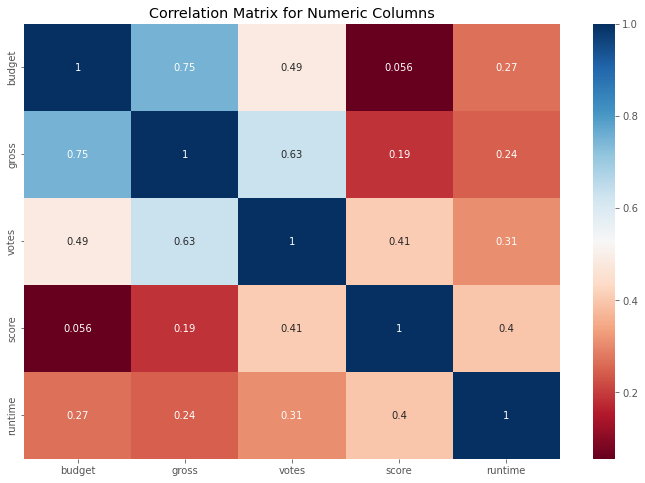

In [139]:
#visualizing correlation with a heatmap

corr_mat = movies[['budget','gross','votes','score','runtime']].corr()

sns.heatmap(corr_mat, annot=True, cmap='RdBu')

plt.title('Correlation Matrix for Numeric Columns')
plt.show()

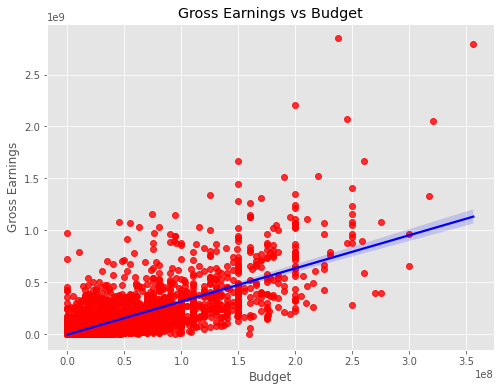

In [140]:
# having the highest correlation between budget and gross earnings, we can plot a regression plot to visualize the relationship
plt.figure(figsize=(8,6))

sns.regplot(x='budget',y='gross',data=movies, scatter_kws={'color': 'red'}, line_kws={'color':'blue'})

plt.title('Gross Earnings vs Budget')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')
plt.show()

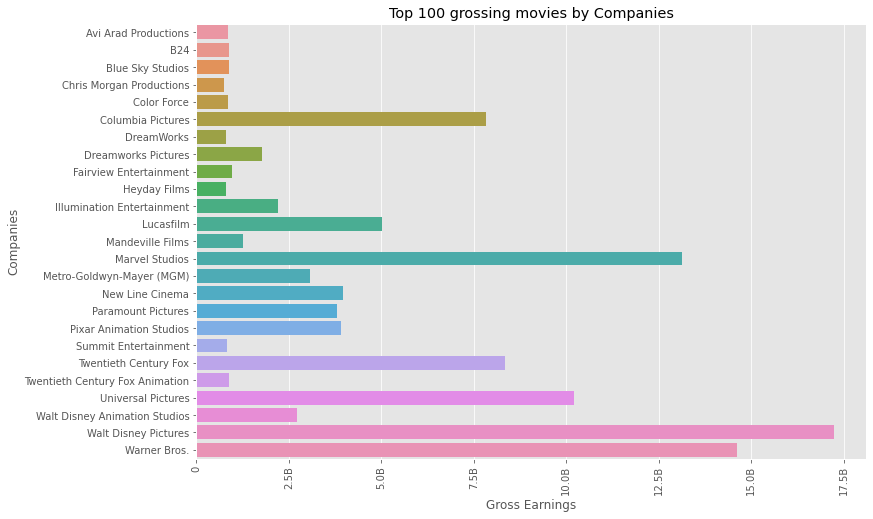

In [170]:
# draw up a bar chat to see company shares in the top 100 highest grossing movies

movies_100 = movies.head(100)

movies_100 = pd.DataFrame(movies_100.groupby('company')['gross'].sum())
movies_100.index

sns.barplot(y=movies_100.index, x='gross', data = movies_100, ci=None, orient='h')

plt.title('Top 100 grossing movies by Companies')
plt.ylabel('Companies')
plt.xlabel('Gross Earnings')
plt.xticks(rotation=90)
plt.xticks([0,2500000000,5000000000,7500000000,10000000000,12500000000,15000000000,17500000000], ['0','2.5B','5.0B','7.5B','10.0B','12.5B','15.0B','17.5B'])

plt.show()


In [171]:
movies_100.sort_values(by=['gross'],ascending=False)

,gross
company,
Walt Disney Pictures,17235309741
Warner Bros.,14619930566
Marvel Studios,13120339056
Universal Pictures,10194073718
Twentieth Century Fox,8347504282
Columbia Pictures,7834907205
Lucasfilm,5021052687
New Line Cinema,3953398944
Pixar Animation Studios,3901166199


***
We can see that **Walt Disney Pictures** made the most gross earnings from the top with a total sum of **$17,235,309,741** 

Having **Warner Bros** in second with a value of **$14,619,930,566** , followed by the rest of the pack... 

***
<br/>

*N.B: More and more analysis could be done on this dataset with lots more gainful insights obtained*

<img src="https://thumbs2.imgbox.com/c3/d2/VcV0bA5L_t.jpg" style="width: 1100px;"/>